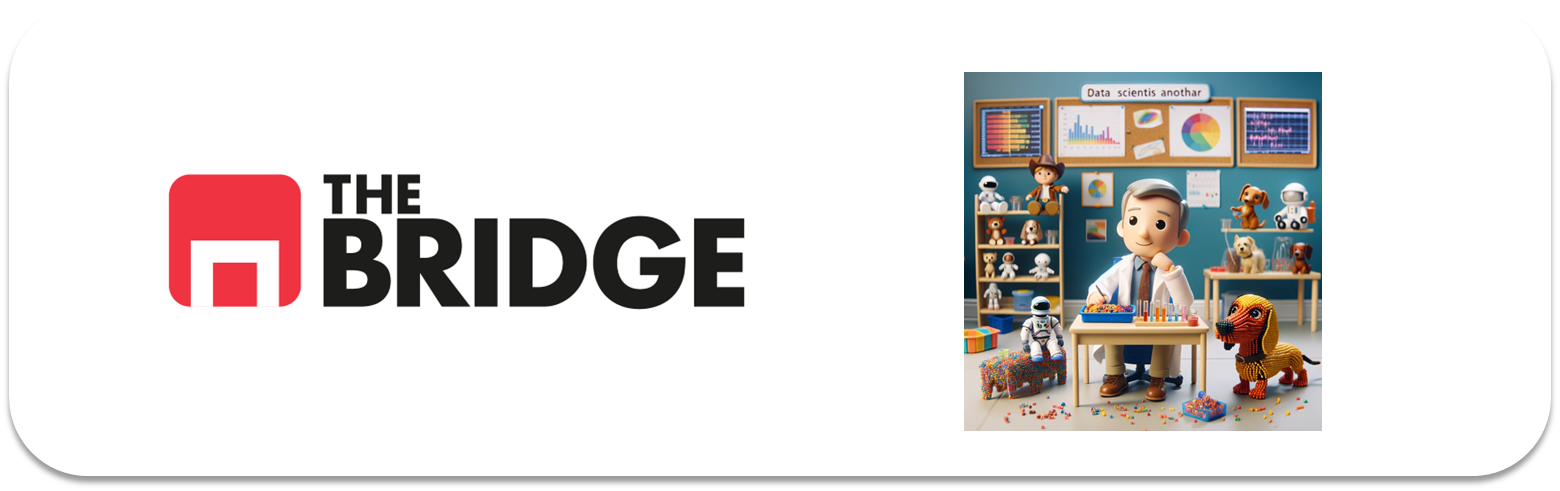

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [3]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_titanic = pd.DataFrame(sns.load_dataset('titanic'))
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [6]:
#Muestra la info básica y los nulos del dataframe.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
# Calcula el % de NaN en cada columna.
nan_porcentaje = (df_titanic.isna().sum() / len(df_titanic)) * 100

# Muestra el % de nulos.
nan_porcentaje

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [8]:
# Elimina la columna PARCH y DECK por que tiene muchos NaN.
df_titanic = df_titanic.drop(['parch','deck'], axis=1)

In [18]:
# Para el resto de columnas con NaNs:
# Para age reemplazo los NaN con la media de edad.
age_media = df_titanic['age'].mean()
df_titanic['age'] = df_titanic['age'].fillna(age_media)

# Para la columna embarked, reemplazo los NaN con una 0 de Other.
df_titanic['embarked'] = df_titanic['embarked'].fillna('U')

# Para la columna embark_town, reemplazo los NaN por Other.
df_titanic['embark_town'] = df_titanic['embark_town'].fillna('unknow')

In [19]:
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived     | Booleano yes o no|
| pclass     | La clase en la que viajaba del 1 al 3|
| sex     | Male or Female|
| age     | La edad|
| sibsp     | Núm pasajeros que viajaban con esa persona|
| fare     | Lo que pagó por el ticket|
| embarked     | La inicial de la ciudad en la que embarcó|
| class     | Similar a pclass pero pone First, Second o Third|
| who     | Similar a sex, man or woman|
| adult_male     | Booleano true o false dependiendo de si es hombre o no|
| embark_town     | Ciudad en la que embarcó, nombre completo|
| alive     | Booleano yes o no|
| alone     | Booleano true o false dependiendo de si había acompañantes, relacionada con sibsp|



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [20]:
#No entiendo muy bien este ejercicio, las tres ciudades son las que se indican en "embark_town" y ya tienen la inicial correcta en "embarked"
df_titanic["embarked"].unique()

array(['S', 'C', 'Q', '0'], dtype=object)

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

-Clasificación de las variables:
Las variables se clasifican en:
Variables Categóricas:

Binarias: survived, alone
Nominales: who, embarked
Ordinales: class

Variables Numéricas:

Continuas: age, fare

In [ ]:
# Para variables numéricas
print("Medidas de tendencia central para variables numéricas:")
numeric_summary = df_titanic[['age', 'fare']].agg(['mean', 'median'])
print("\nAge y Fare:")
print(numeric_summary)

# Para variables categóricas, calculamos la moda por separado
print("\nModa para variables categóricas:")
categorical_vars = ['survived', 'who', 'class', 'embarked', 'alone']

for var in categorical_vars:
    mode_value = df_titanic[var].mode()[0]  # Tomamos el primer valor en caso de moda múltiple
    mode_count = df_titanic[var].value_counts().iloc[0]  # Frecuencia del valor modal
    mode_percentage = (mode_count / len(df_titanic)) * 100  # Porcentaje del valor modal
    
    print(f"\n{var.capitalize()}:")
    print(f"- Valor modal: {mode_value}")
    print(f"- Frecuencia: {mode_count}")
    print(f"- Porcentaje: {mode_percentage:.2f}%")

Medidas de tendencia central para variables numéricas:

Age y Fare:
              age       fare
mean    29.699118  32.204208
median  29.699118  14.454200

Moda para variables categóricas:

Survived:
- Valor modal: 0
- Frecuencia: 549
- Porcentaje: 61.62%

Who:
- Valor modal: man
- Frecuencia: 537
- Porcentaje: 60.27%

Class:
- Valor modal: Third
- Frecuencia: 491
- Porcentaje: 55.11%

Embarked:
- Valor modal: S
- Frecuencia: 644
- Porcentaje: 72.28%

Alone:
- Valor modal: True
- Frecuencia: 537
- Porcentaje: 60.27%


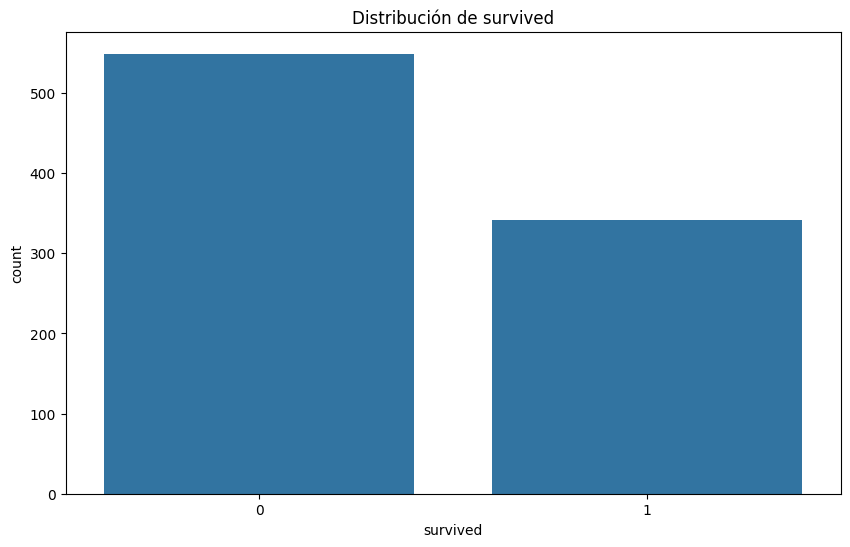


Frecuencias para survived:
Absolutas:
survived
0    549
1    342
Name: count, dtype: int64

Relativas (%):
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


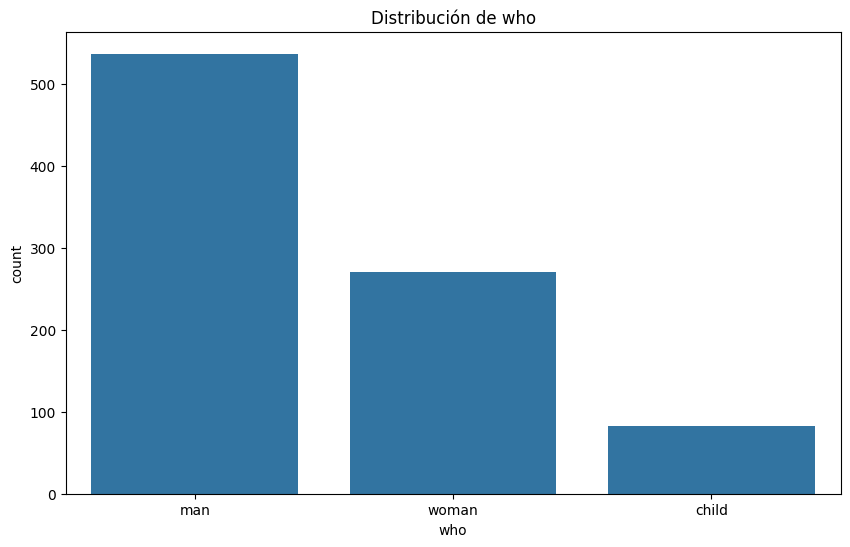


Frecuencias para who:
Absolutas:
who
man      537
woman    271
child     83
Name: count, dtype: int64

Relativas (%):
who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


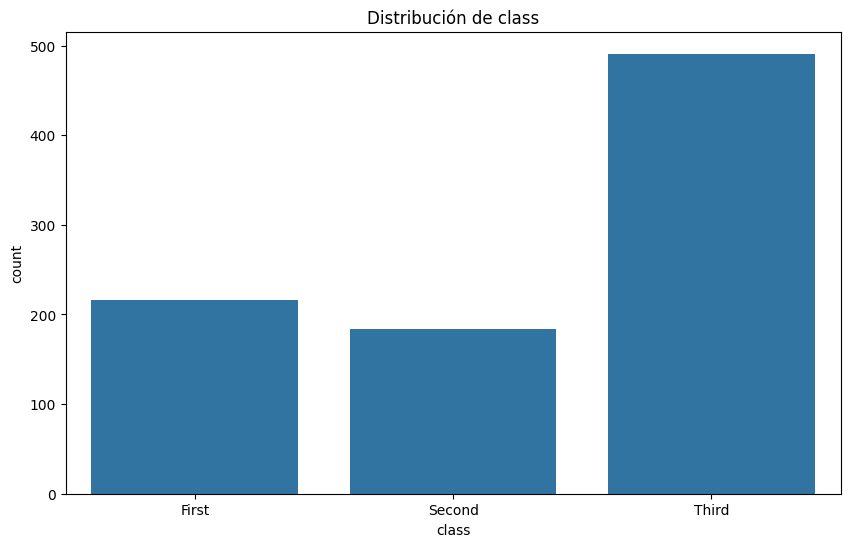


Frecuencias para class:
Absolutas:
class
Third     491
First     216
Second    184
Name: count, dtype: int64

Relativas (%):
class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64


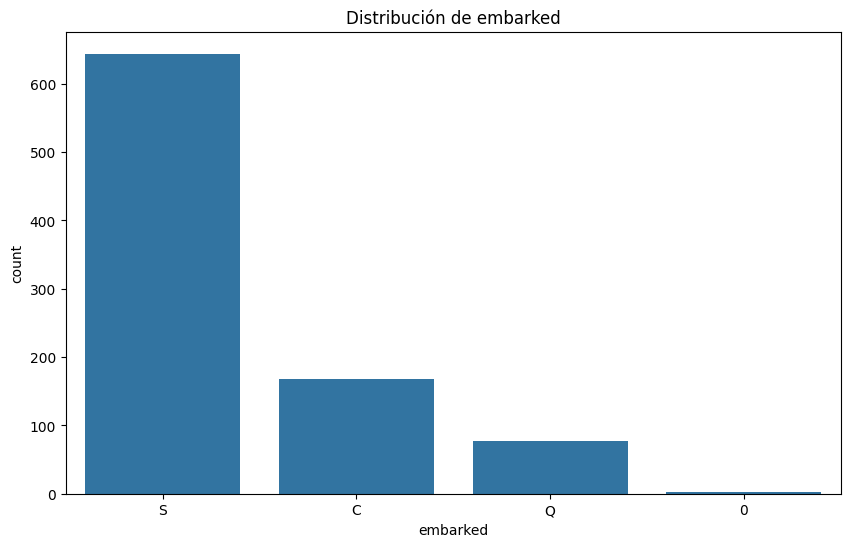


Frecuencias para embarked:
Absolutas:
embarked
S    644
C    168
Q     77
0      2
Name: count, dtype: int64

Relativas (%):
embarked
S    72.278339
C    18.855219
Q     8.641975
0     0.224467
Name: proportion, dtype: float64


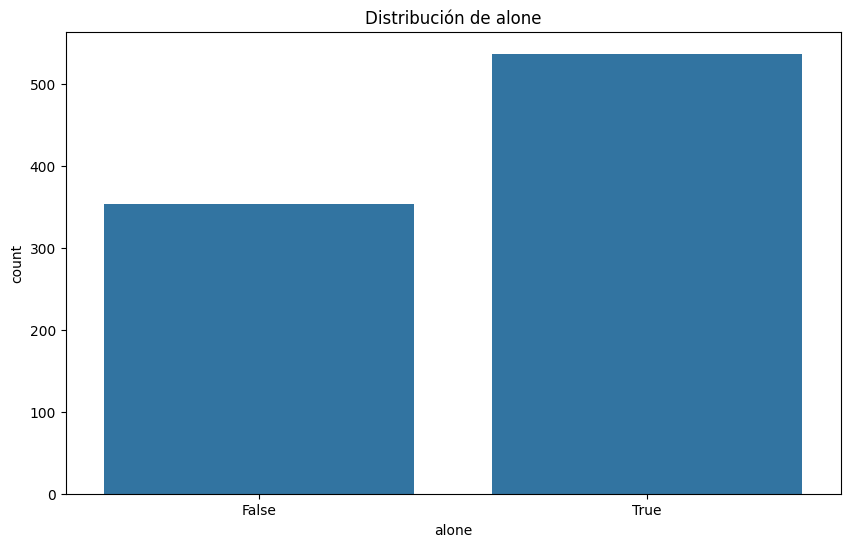


Frecuencias para alone:
Absolutas:
alone
True     537
False    354
Name: count, dtype: int64

Relativas (%):
alone
True     60.26936
False    39.73064
Name: proportion, dtype: float64


In [25]:
# Función para crear gráficos de barras
def plot_categorical(variable):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_titanic, x=variable)
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=0)
    plt.show()
    
    # Mostrar frecuencias absolutas y relativas
    freq_abs = df_titanic[variable].value_counts()
    freq_rel = df_titanic[variable].value_counts(normalize=True) * 100
    print(f"\nFrecuencias para {variable}:")
    print("Absolutas:")
    print(freq_abs)
    print("\nRelativas (%):")
    print(freq_rel)

# Aplicar a todas las variables categóricas
for var in categorical_vars:
    plot_categorical(var)


Medidas de posición para age:
Q1: 22.00
Q2 (mediana): 29.70
Q3: 35.00
IQR: 13.00
Rango: 79.58

Medidas de posición para fare:
Q1: 7.91
Q2 (mediana): 14.45
Q3: 31.00
IQR: 23.09
Rango: 512.33


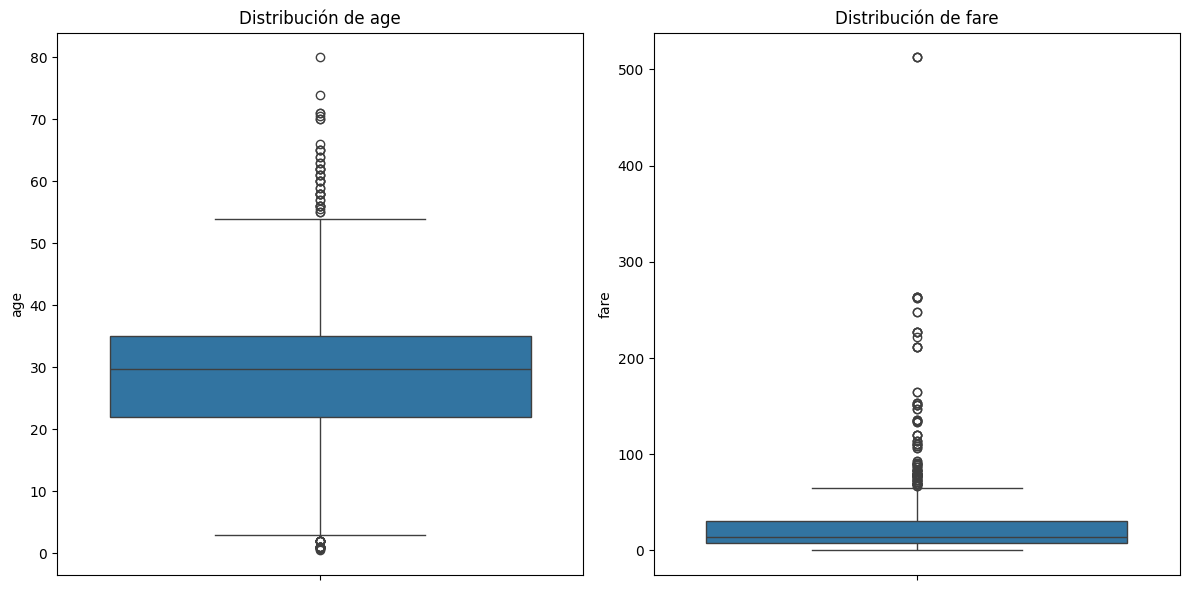

In [26]:
# Gráficos de caja para variables numéricas
plt.figure(figsize=(12, 6))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df_titanic, y=var)
    plt.title(f'Distribución de {var}')
    
    # Calcular cuartiles y rango
    q1 = df_titanic[var].quantile(0.25)
    q3 = df_titanic[var].quantile(0.75)
    iqr = q3 - q1
    print(f"\nMedidas de posición para {var}:")
    print(f"Q1: {q1:.2f}")
    print(f"Q2 (mediana): {df_titanic[var].median():.2f}")
    print(f"Q3: {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Rango: {df_titanic[var].max() - df_titanic[var].min():.2f}")
plt.tight_layout()
plt.show()

In [27]:
# Calcular medidas de dispersión
for var in numeric_vars:
    print(f"\nMedidas de dispersión para {var}:")
    print(f"Varianza: {df_titanic[var].var():.2f}")
    print(f"Desviación estándar: {df_titanic[var].std():.2f}")
    print(f"Coeficiente de variación: {(df_titanic[var].std() / df_titanic[var].mean() * 100):.2f}%")


Medidas de dispersión para age:
Varianza: 169.05
Desviación estándar: 13.00
Coeficiente de variación: 43.78%

Medidas de dispersión para fare:
Varianza: 2469.44
Desviación estándar: 49.69
Coeficiente de variación: 154.31%



Medidas de forma para age:
Asimetría: 0.43
Curtosis: 0.97


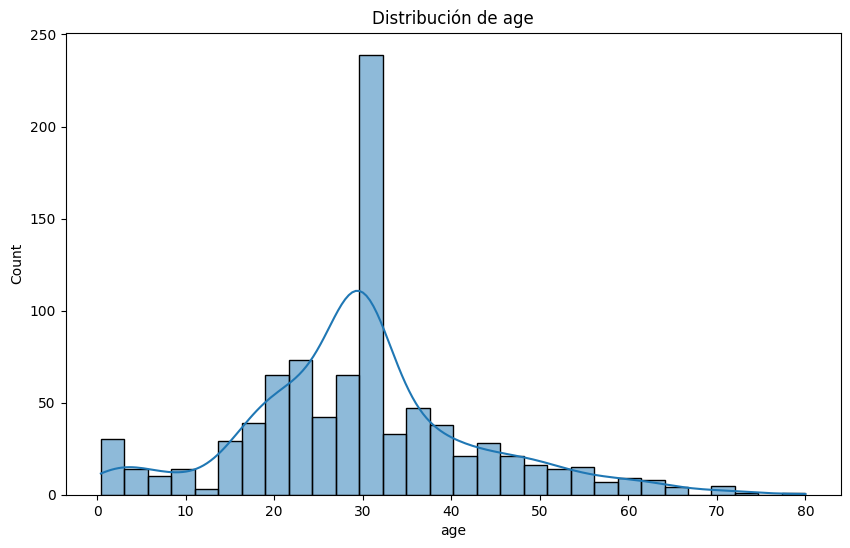


Medidas de forma para fare:
Asimetría: 4.79
Curtosis: 33.40


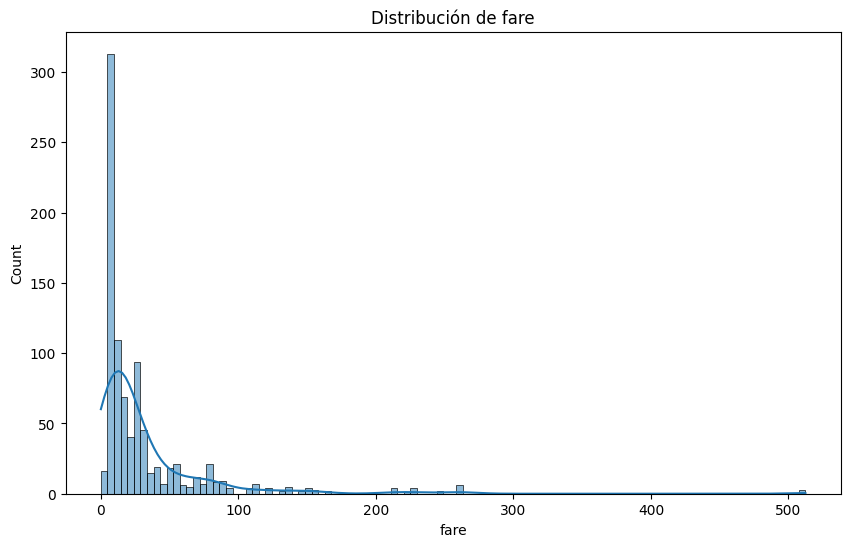

In [28]:
# Histogramas con curvas de densidad
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_titanic, x=var, kde=True)
    plt.title(f'Distribución de {var}')
    
    # Calcular asimetría y curtosis
    print(f"\nMedidas de forma para {var}:")
    print(f"Asimetría: {df_titanic[var].skew():.2f}")
    print(f"Curtosis: {df_titanic[var].kurtosis():.2f}")
    plt.show()


Análisis de outliers para age:
Límite inferior: 2.50
Límite superior: 54.50
Número de outliers: 66
Porcentaje de outliers: 7.41%


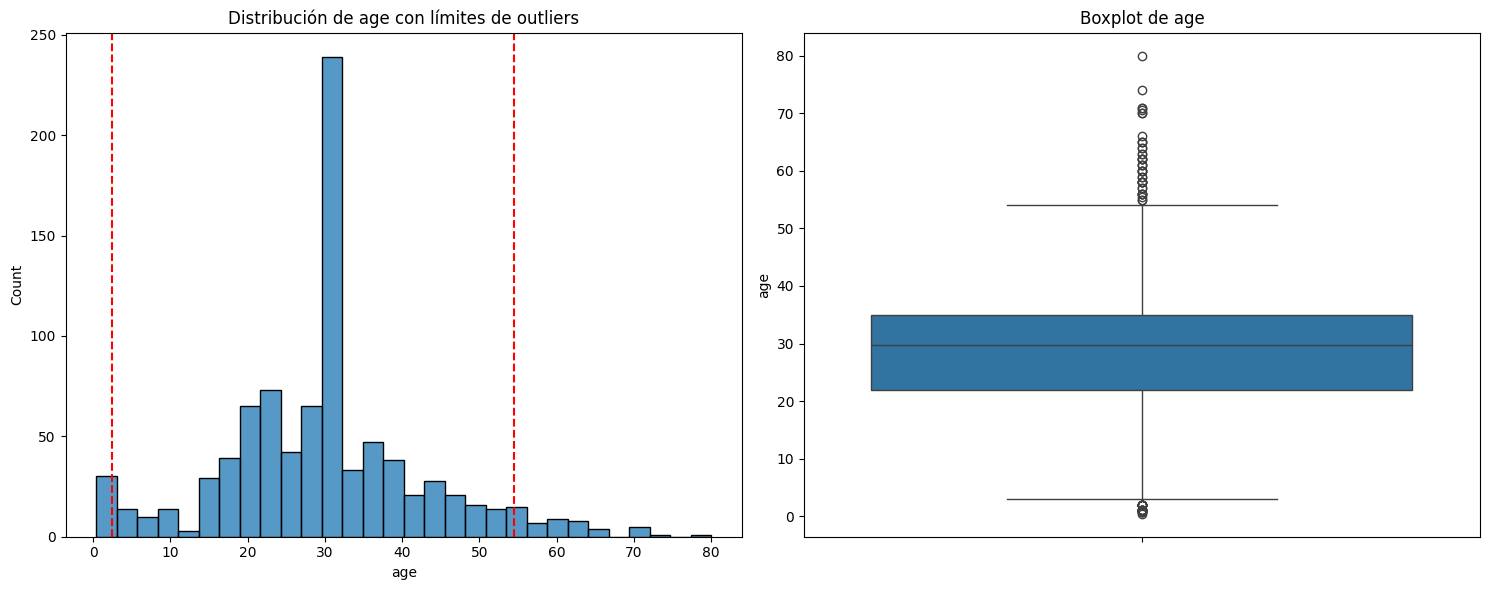


Análisis de outliers para fare:
Límite inferior: -26.72
Límite superior: 65.63
Número de outliers: 116
Porcentaje de outliers: 13.02%


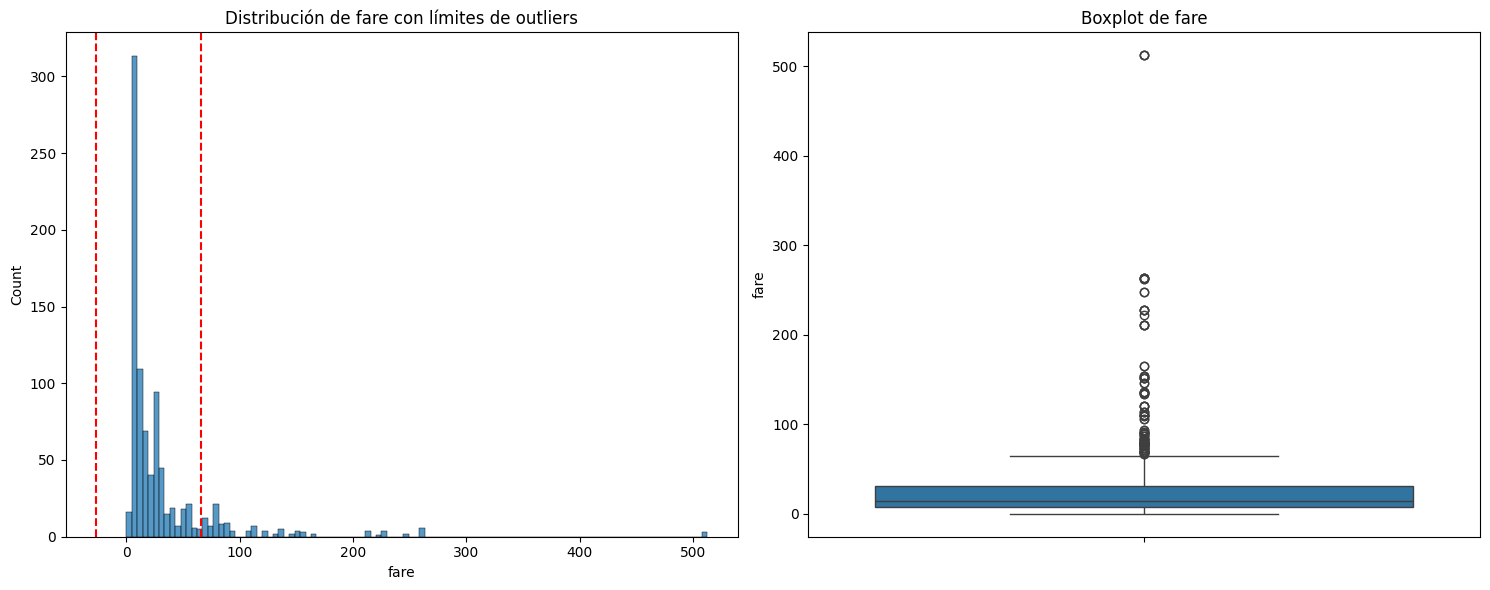

In [31]:
for var in numeric_vars:
    # Calcular límites para outliers
    q1 = df_titanic[var].quantile(0.25)
    q3 = df_titanic[var].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identificar outliers
    outliers = df_titanic[(df_titanic[var] < lower_bound) | (df_titanic[var] > upper_bound)][var]
    
    print(f"\nAnálisis de outliers para {var}:")
    print(f"Límite inferior: {lower_bound:.2f}")
    print(f"Límite superior: {upper_bound:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(df_titanic)*100):.2f}%")
    
    # Visualización combinada
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histograma con outliers marcados
    sns.histplot(data=df_titanic, x=var, ax=ax1)
    ax1.axvline(lower_bound, color='r', linestyle='--')
    ax1.axvline(upper_bound, color='r', linestyle='--')
    ax1.set_title(f'Distribución de {var} con límites de outliers')
    
    # Boxplot
    sns.boxplot(data=df_titanic, y=var, ax=ax2)
    ax2.set_title(f'Boxplot de {var}')
    
    plt.tight_layout()
    plt.show()

Conclusiones:


- el % de supervivientes ronda el 30%;
- viajaban muchos más hombres que mujeres;
- viajaba más gente sola que acompañada;
- la edad media era de casi 30 años y el ticket medio costaba 32 pounds;
- la mayoría de viajeros viajaban en tercera clase y habían embarcado en Southampton;
- las medidas de dispersión para fare y age son muy altas. Para age, la media es 30 años pero hay valores muy dispersos. Para fare, la media es 32 y la mayoría se concentra en menos de 32, pero hubo gente que pagó mucho más por su ticket.